In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import math

## Creating the Dataset

In [2]:
### inputs for cases 2,4,5
x_twoInput = [[0,0], [0,1], [1,0], [1,1]]

x_fourInput = [[0,0,0,0], [0,0,0,1], [0,0,1,0], [0,1,0,0],
               [1,0,0,0], [0,0,1,1], [0,1,0,1], [1,0,0,1],
               [0,1,1,0], [1,0,1,0], [1,1,0,0], [0,1,1,1],
               [1,0,1,1], [1,1,0,1], [1,1,1,0], [1,1,1,1]]

x_fiveInput = [[0,0,0,0,0], [0,0,0,0,1], [0,0,0,1,0], [0,0,1,0,0],
               [0,1,0,0,0], [1,0,0,0,0], [0,0,0,1,1], [0,0,1,0,1],
               [0,1,0,0,1], [1,0,0,0,1], [0,0,1,1,0], [0,1,0,1,0],
               [1,0,0,1,0], [0,1,1,0,0], [1,0,1,0,0], [1,1,0,0,0],
               [0,0,1,1,1], [0,1,0,1,1], [0,1,1,0,1], [0,1,1,1,0],
               [1,0,0,1,1], [1,0,1,0,1], [1,0,1,1,0], [1,1,0,0,1],
               [1,1,0,1,0], [1,1,1,0,0], [0,1,1,1,1], [1,0,1,1,1],
               [1,1,0,1,1], [1,1,1,0,1], [1,1,1,1,0], [1,1,1,1,1]]

x_twoInput = np.array(x_twoInput)
x_twoInput = np.hstack([np.array([[-1],[-1],[-1],[-1]]), x_twoInput])

x_fourInput = np.array(x_fourInput)
x_fourInput = np.hstack([np.array([[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1]]), x_fourInput])

x_fiveInput = np.array(x_fiveInput)
x_fiveInput = np.hstack([np.array([[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],
                               [-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1],[-1]]), x_fiveInput])

In [3]:
### labels for all cases
yXOR=[[0],[1],[1],[0]]

yMajority4=[[0],[0],[0],[0],
[0],[0],[0],[0],
[0],[0],[0],[1],
[1],[1],[1],[1]]
yPalindrome4=[[1],[0],[0],[0],
[0],[0],[0],[1],
[1],[0],[0],[0],
[0],[0],[0],[1]]
yParity4=[[1],[0],[0],[0],
[0],[1],[1],[1],
[1],[1],[1],[0],
[0],[0],[0],[1]]

yMajority5=[[0],[0],[0],[0],
[0],[0],[0],[0],
[0],[0],[0],[0],
[0],[0],[0],[0],
[1],[1],[1],[1],
[1],[1],[1],[1],
[1],[1],[1],[1],
[1],[1],[1],[1]]

yPalindrome5=[[1],[0],[0],[1],
[0],[0],[0],[0],
[0],[1],[0],[1],
[0],[0],[0],[0],
[0],[0],[0],[1],
[0],[1],[0],[0],
[0],[0],[0],[0],
[1],[0],[0],[1]]

yParity5=[[1],[0],[0],[0],
[0],[0],[1],[1],
[1],[1],[1],[1],
[1],[1],[1],[1],
[0],[0],[0],[0],
[0],[0],[0],[0],
[0],[0],[1],[1],
[1],[1],[1],[0]]

#for 2 input
yXOR=np.array(yXOR)

#for 4 input
yPalindrome4=np.array(yPalindrome4)
yMajority4=np.array(yMajority4)
yParity4=np.array(yParity4)

#for 5 input
yPalindrome5=np.array(yPalindrome5)
yMajority5=np.array(yMajority5)
yParity5=np.array(yParity5)

## Implementing Neural Network

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def plot_func(iters, losses, inputs):
    plt.figure()
    plt.plot(iters, losses)
    plt.ylabel("mse_losses")
    plt.xlabel("iterations")
    plt.title(inputs)
    plt.show()

# def outputSigmoid(weights,x):
#   x = np.array(x).reshape(-1, 1)  
#   prod = np.dot(weights.T, x)  
#   return int(sigmoid(prod) > 0.9)
            
# def output_array_sigmoid(weights,trainingData):
#   temp=[]
#   # weights=weights.flatten()
#   for i in range(len(trainingData)):
#     temp.append(outputSigmoid(weights,trainingData[i]))
#   return temp

def gradient_descent(X, y, lr=0.1, epochs=10000):
    m, n = X.shape
    W = np.random.randn(n, 1) * 0.01  # Small weight initialization
    losses = [] # losses array for plotting
    iters = [] #iterations at which losses are being recorded
    
    for epoch in range(epochs):
        z = X @ W
        y_pred = sigmoid(z)
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        mse_loss_value = mse_loss(y, y_pred)
        
        loss = mse_loss_value
        grad = X.T @ ((y_pred - y) * y_pred * (1 - y_pred)) / m
        W -= lr * grad
        
        if epoch % 100 == 0:
            iters.append(epoch)
            losses.append(loss)

    return W, losses, iters

## XOR Training

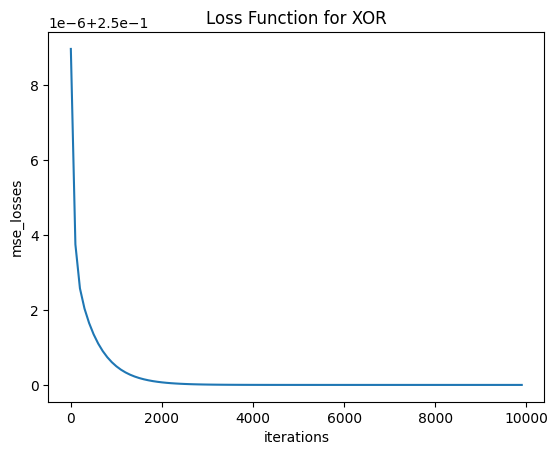

In [5]:
np.random.seed(0)
W_xor, losses_xor, iters_xor = gradient_descent(x_twoInput, yXOR)
plot_func(iters_xor,losses_xor,"Loss Function for XOR")

## Majority Function Training

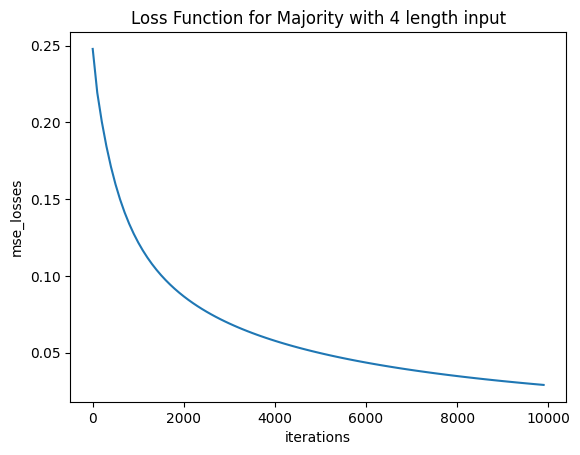

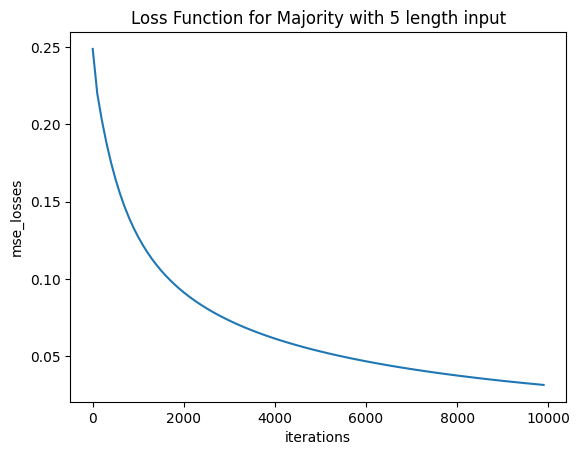

In [6]:
W_maj4, losses_maj4, iters_maj4 = gradient_descent(x_fourInput, yMajority4)
plot_func(iters_maj4,losses_maj4,"Loss Function for Majority with 4 length input")

W_maj5, losses_maj5, iters_maj5 = gradient_descent(x_fiveInput, yMajority5)
plot_func(iters_maj5,losses_maj5,"Loss Function for Majority with 5 length input")

## Palindrome Function Training

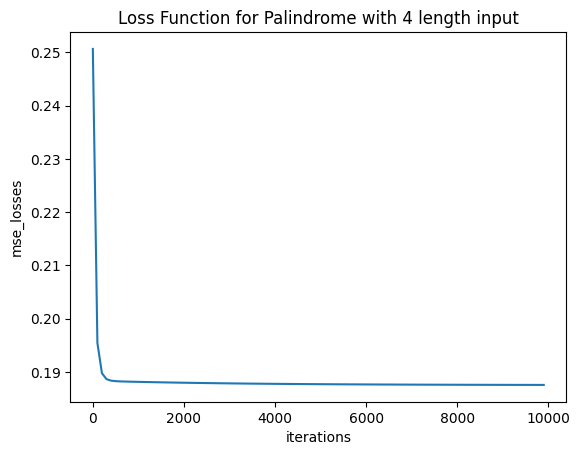

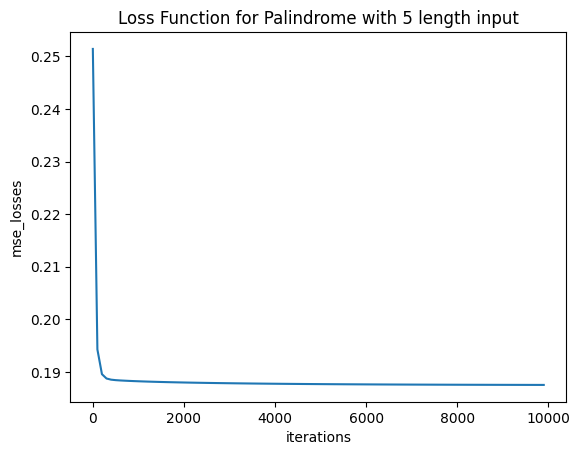

In [7]:
W_pal4, losses_pal4, iters_pal4 = gradient_descent(x_fourInput, yPalindrome4)
plot_func(iters_pal4,losses_pal4,"Loss Function for Palindrome with 4 length input")

W_pal5, losses_pal5, iters_pal5 = gradient_descent(x_fiveInput, yPalindrome5)
plot_func(iters_pal5,losses_pal5,"Loss Function for Palindrome with 5 length input")

## Even Parity Function Training

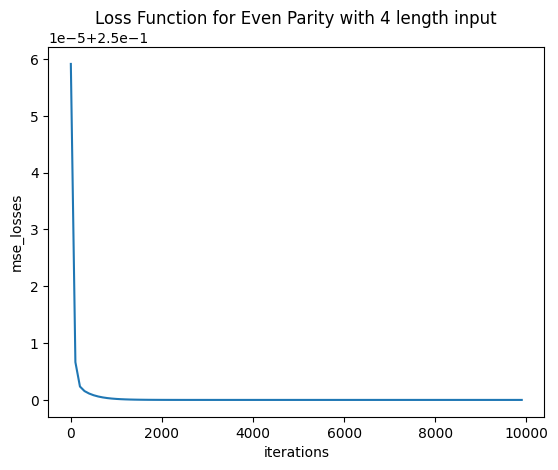

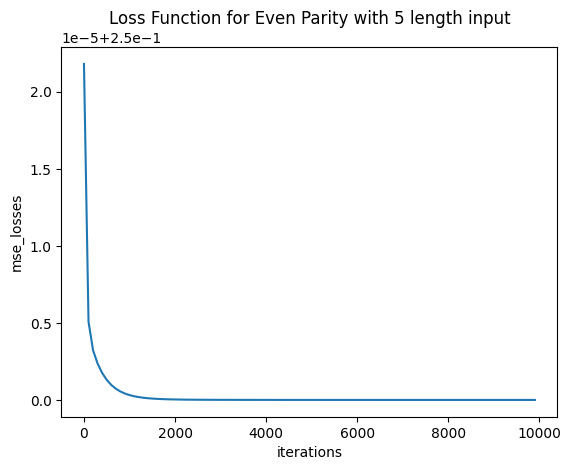

In [8]:
W_par4, losses_par4, iters_par4 = gradient_descent(x_fourInput, yParity4)
plot_func(iters_par4,losses_par4,"Loss Function for Even Parity with 4 length input")

W_par5, losses_par5, iters_par5 = gradient_descent(x_fiveInput, yParity5)
plot_func(iters_par5,losses_par5,"Loss Function for Even Parity with 5 length input")